# Walmart Sales Prediction Model

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Importing Data Set

In [2]:
train = pd.read_csv(r'D:\Minor Project 2\data\train.csv')
feature = pd.read_csv(r'D:\Minor Project 2\data\features.csv')
stores = pd.read_csv(r'D:\Minor Project 2\data\stores.csv')

## Merging Data 

Because all features are in differnt CSV files. 

In [3]:
train_bt = pd.merge(train,stores) 
train = pd.merge(train_bt,feature)

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


## Differentiating Catagorical And Numerical Data 

In [6]:
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
# Train Numerical Data
train_num=train[numeric_var_train]
# Train Categorical Data
train_cat=train[cat_var_train]
print("Numeric Data for Training:")
print(numeric_var_train)
print("***************************")
print("Catagorical Data for Training:")
print(cat_var_train)

Numeric Data for Training:
['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
***************************
Catagorical Data for Training:
['Date', 'Type']


## Data-Preprocessing
Handling all the missing data in the data set

In [7]:
print (train.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [8]:
#Replacing all null values in all markdown features with 0.
train=train.fillna(0)

In [9]:
print (train.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


## Feature extraction
Creating new features from existing features

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [11]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [12]:
#Extracting Date
# From YY/MM/DD format seperating year, month and day.
train['Date'] = pd.to_datetime(train['Date'])

In [13]:
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

In [14]:
train.head()
#here 4 more features are been addded

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5


In [15]:
print (train.Type.value_counts())

A    215478
B    163495
C     42597
Name: Type, dtype: int64


In [16]:
#Converting Catagorical Data into Numeric Data
print (train.IsHoliday.value_counts())

False    391909
True      29661
Name: IsHoliday, dtype: int64


In [17]:
train_test_data = [train]

In [18]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5


In [19]:
#Converting Type Feature i.e. A,B,C into 1,2,3 respectively 
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [20]:
#Converting IsHoliday fearure
# if no holiday then 0, if holiday then 1
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [21]:
train.head()
#after converting IsHoliday and Type

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

## Feature Selection
Selecting most relevant features that effect weekly_sales(i.e. target value), for that:
### Creating Corelation Matrix

In [23]:
#using pearson co-relation matrix 
train_corr=pd.DataFrame(train.corr())
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_month,Date_year,Date_day
Store,1.000000,0.024004,-0.085195,-0.000548,0.226410,-0.182881,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,0.001011,0.002997,-0.000015
Dept,0.024004,1.000000,0.148032,0.000916,0.003708,-0.002966,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,0.000904,0.003738,-0.000678
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.182242,0.243828,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,0.028409,-0.010111,-0.006187
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.000798,0.000593,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,0.010460,0.123376,-0.056746,0.045465
Type,0.226410,0.003708,-0.182242,-0.000798,1.000000,-0.811593,0.042981,0.029687,-0.126345,-0.055318,-0.024013,-0.089770,-0.130125,-0.065812,0.148720,-0.000069,0.004208,0.000279


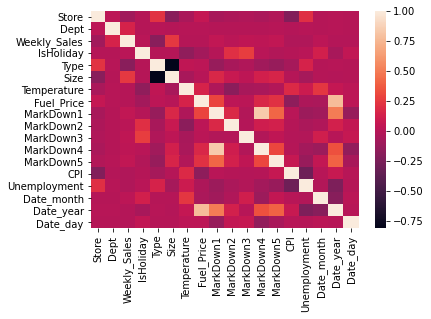

In [24]:
sns.heatmap(train.corr())

## Droping irrelevant features 
Droping IsHoliday, Temperature and Fuel_Price as they effect weekly sales the least.  

In [25]:
features_drop=['IsHoliday','Fuel_Price','Temperature']
train=train.drop(features_drop, axis=1)

In [26]:
#final data for training 
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,1,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
1,1,2,2010-02-05,50605.27,1,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
2,1,3,2010-02-05,13740.12,1,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
3,1,4,2010-02-05,39954.04,1,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
4,1,5,2010-02-05,32229.38,1,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5


In [27]:
#Final data for training and testing 
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=1)

## Prediction
### Using Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#training model using training data
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
#measuring accuracy using testing data
acc=round(reg.score(X_test, y_test)*100,2)
print("Linear Regression Accuracy:"+str(acc)+"%" )

Linear Regression Accuracy:8.57%


### Using Decision Tree 

In [29]:
reg = DecisionTreeRegressor(random_state=0)
#training model using training data
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
#measuring accuracy using testing data
acc=round(reg.score(X_test, y_test)*100,2)
print("Decision Tree Accuracy:"+str(acc)+"%" )

Decision Tree Accuracy:93.99%



### Using Random Forest 

In [30]:
clf = RandomForestRegressor(n_estimators=100)
#training model using training data
clf.fit(X_train, y_train)
#measuring accuracy using testing data
acc_rf= round(clf.score(X_test, y_test) * 100, 2)
print ("Random Forest Accuracy:"+str(acc_rf)+'%')

Random Forest Accuracy:97.47%
